### Capstone Practicum Project course II






# CLABSI Research Project Analysis

### CRISP-DM

CRISP-DM (Cross-Industry Standard Process for Data Mining) is a process model that serves as the base for a data science process.

CRISP-DM has six sequential phases:
1. Business Understanding Phase
1. Data Understanding Phase
1. Data Preparation Phase
1. Modeling Phase
1. Evaluation Phase
1. Deployment Phase

#### Structure of CRISP-DM

<img src='CRISP-DM.png'></img>

# CLABSI Research Study of Papers 1, 2 and 3

# Research/Business Understanding

# Data Understanding

#### Importing packages

In [24]:
import pandas as pd
import numpy as np
from numpy import NaN as NA
import numpy.random as random
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import histplot as hist
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from time import time
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, roc_curve, precision_score, f1_score
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# inline plot
%matplotlib inline

# seaborn style
sns.set_style('ticks')

In [25]:
np.random.seed(8)
random_state = 8

#### Importing/Loading the csv file/dataset

In [26]:
# Loading the data file
df_clabsi = pd.read_csv('bzan6361_clabsi.csv') 

/var/folders/pw/8wrh61bd6z55kzbqgvtlkx1c0000gn/T/ipykernel_47898/2668413894.py:2: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clabsi = pd.read_csv('bzan6361_clabsi.csv')


In [27]:
# Displaying four records

pd.set_option('display.max_columns',None)
pd.set_option("max_colwidth", None)
df_clabsi.head(4)

PatientKey  EncounterKey        Date    InsertionDate       AgeGroup  \
0      887558       7883287  2019-04-02    4/2/2019 0:00   8 - 10 Years   
1     2874369       6865957  2018-10-30  10/30/2018 0:00   8 - 10 Years   
2     2684699       4336219  2017-08-24   8/24/2017 0:00  14 - 16 Years   
3     2975875       8111296  2019-05-18   5/18/2019 0:00    0 - 2 Years   

      DepartmentDSC  HospitalDay  \
0       LT CVICU 17            1   
1       LT CVICU 17            1   
2  WT PUL ADOL ENDO            5   
3         LT PICU 9            2   

                                                   LineDrainDSC  LineCount  \
0  [REMOVED] CVC Triple Lumen - 04/01/19 Right Internal jugular          1   
1  [REMOVED] CVC Double Lumen - 10/29/18 Right Internal jugular          1   
2                   PICC Single Lumen - 08/23/17 Right Upperarm          1   
3           [REMOVED] CVC Triple Lumen - 05/17/19 Right Femoral          1   

   LineDay ClabsiDTS  HasCLABSI  DaysToCLABSI  HasFutureEncounterCLABSI  \
0        1       NaN      False           NaN                     False   
1        1       NaN      False           NaN                     False   
2        1       NaN      False           NaN                     False   
3        1       NaN      False           NaN                     False   

   PastCLABSIs MostRecentClabsiDTS  HadPreviousCLABSI  LineDaysPort  \
0            0                 NaN              False             0   
1            0                 NaN              False             0   
2            0                 NaN              False             0   
3            0                 NaN              False             0   

   LineDaysPICC  LineDaysVenousAccess  LineDaysSingleLumen  \
0             0                     0                    0   
1             0                     0                    0   
2             1                     0                    1   
3             0                     0                    0   

   LineDaysDoubleLumen  LineDaysTripleLumen  LineDaysQuadrupleLumen  \
0                    0                    1                       0   
1                    1                    0                       0   
2                    0                    0                       0   
3                    0                    1                       0   

   LineDaysMultiLumen  LineDaysFemoral  LineDaysSubclavian  LineDaysUpperArm  \
0                   1                0                   0                 0   
1                   1                0                   0                 0   
2                   0                0                   0                 1   
3                   1                1                   0                 0   

   LineDaysJugular  LineDaysChest  LineDaysLeg  HasRecentLDAFlowsheetRecords  \
0                1              0            0                         False   
1                1              0            0                         False   
2                0              0            0                          True   
3                0              0            0                          True   

   FlushedToday  FlushedLast4  FlushedLast7  FlushedLast10  \
0           NaN           NaN           NaN            NaN   
1           NaN           NaN           NaN            NaN   
2           2.0           2.0           2.0            2.0   
3          16.0          16.0          16.0           16.0   

   CapChangesLastToday  CapChangesLast4  CapChangesLast7  CapChangesLast10  \
0                  NaN              NaN              NaN               NaN   
1                  NaN              NaN              NaN               NaN   
2                  1.0              1.0              1.0               1.0   
3                  0.0              0.0              0.0               0.0   

   DressingChangesLastToday  DressingChangesLast4  DressingChangesLast7  \
0                       NaN                   NaN                   NaN   
1 

#### Quick overview of data

In [28]:
# The shape of the dataset and the target variable with true instances

print(f'The dataset has {df_clabsi.shape[0]} rows and {df_clabsi.shape[1]} columns.')
print('='*40)
print('With the target variable HasCLABSI displaying')
print((df_clabsi.HasCLABSI==1).sum(), f'instances as TRUE out of {df_clabsi.shape[0]} instances.')

The dataset has 14236 rows and 278 columns.
With the target variable HasCLABSI displaying
52 instances as TRUE out of 14236 instances.


In [29]:
# Initial review of the dataset

df_clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14236 entries, 0 to 14235
Columns: 278 entries, PatientKey to ICUDaysLast2
dtypes: bool(19), float64(19), int64(208), object(32)
memory usage: 28.4+ MB


In [30]:
# The dtypes of the dataset

pd.set_option('display.max_rows',None)
print('The dataset has following columns with respective dtypes:')
print()
print(df_clabsi.dtypes)

The dataset has following columns with respective dtypes:

PatientKey                                 int64
EncounterKey                               int64
Date                                      object
InsertionDate                             object
AgeGroup                                  object
DepartmentDSC                             object
HospitalDay                                int64
LineDrainDSC                              object
LineCount                                  int64
LineDay                                    int64
ClabsiDTS                                 object
HasCLABSI                                   bool
DaysToCLABSI                             float64
HasFutureEncounterCLABSI                    bool
PastCLABSIs                                int64
MostRecentClabsiDTS                       object
HadPreviousCLABSI                           bool
LineDaysPort                               int64
LineDaysPICC                               int64
LineDaysVe

In [31]:
# Missing values in the given dataset

print(f'There are {df_clabsi.isnull().sum().sum()} missing values in the dataset')
print('='*50)
print('With the following columns displaying number of missing values:')
print()
print(df_clabsi.isnull().sum())

There are 239605 missing values in the dataset
With the following columns displaying number of missing values:

PatientKey                                   0
EncounterKey                                 0
Date                                         0
InsertionDate                                0
AgeGroup                                     0
DepartmentDSC                              325
HospitalDay                                  0
LineDrainDSC                                 0
LineCount                                    0
LineDay                                      0
ClabsiDTS                                12713
HasCLABSI                                    0
DaysToCLABSI                             13143
HasFutureEncounterCLABSI                     0
PastCLABSIs                                  0
MostRecentClabsiDTS                      13003
HadPreviousCLABSI                            0
LineDaysPort                                 0
LineDaysPICC                              

#### `Note`:

The given CLABSI dataset has 14236 rows and 278 columns with target variable 'HasCLABSI'. The dataset includes 19 variables as bool, 19 as float64, 208 as int64 and 32 as object variables datatypes. There are a total of 239605 missing values.

# Data Preprocessing

Data preprocessing is being done to significantly understand and resolve the restrictions and challenges associated with the given CLABSI dataset and to help in analysing the opportunities in the EDA process and support the completion of project to attain the required business objective.  

#### Replacing missing values with 0

In [32]:
# Replacing missing values with '0'
df_clabsi = df_clabsi.fillna(0)

#### Sanity check

In [33]:
# Performing sanity check after replacing missing values with '0'
df_clabsi.isnull().sum().sum()

0

### `Note`:

The following columns had missing values in the range 9038 to 13604 before replacing these missing values with zero: 

1. ClabsiDTS, 
1. DaysToCLABSI, 
1. MostRecentClabsiDTS, 
1. DiagnosisLast15, 
1. DiagnosisLast5, 
1. DiagnosisLast3, 
1. DiagnosisLast2, 
1. SurgeriesLast15, 
1. SurgeriesLast5, 
1. SurgeriesLast3, 
1. SurgeriesLast2 

 
These huge number of missing values in the dataset will clearly lead to a loss of information, reduce the statistical power and adds ambiguity to the analysis process. Moreover, this lack of data may introduce selection bias, which could potentially invalidate the entire study leading to biased results.

Therefore, dropping the above mentioned columns would be significant in overcoming the restrictions and challenges associated with the given CLABSI dataset.

### Dropping the following columns from the dataset : 

ClabsiDTS, DaysToCLABSI, MostRecentClabsiDTS, DiagnosisLast15, DiagnosisLast5, DiagnosisLast3, DiagnosisLast2, SurgeriesLast15, SurgeriesLast5, SurgeriesLast3, SurgeriesLast2

In [34]:
df_clabsi = df_clabsi.drop(columns=['ClabsiDTS','DaysToCLABSI','MostRecentClabsiDTS','DiagnosisLast15','DiagnosisLast5',
                                   'DiagnosisLast3','DiagnosisLast2','SurgeriesLast15','SurgeriesLast5','SurgeriesLast3',
                                   'SurgeriesLast2'])

#### Transforming object columns of date to datetime columns

In [35]:
# Transforming 'Date' and 'InsertionDate' from object to datetime

df_clabsi['Date'] = pd.to_datetime(df_clabsi['Date'])
df_clabsi['InsertionDate'] = pd.to_datetime(df_clabsi['InsertionDate'])
df_clabsi['LastAncDate'] = pd.to_datetime(df_clabsi['LastAncDate'])

#### Transforming binary text (binary string bool) columns with labels "TRUE" and "FALSE" to a dummy columns of float 

In [36]:
# transforming binary string bool columns to dummy columns of float

df_clabsi=df_clabsi.astype({'HasCLABSI':float,
                            'HasFutureEncounterCLABSI':float,
                            'HadPreviousCLABSI':float,
                            'HasRecentLDAFlowsheetRecords':float,
                            'DiagnosisLeukemiaLast30':float,
                            'DiagnosisLeukemiaLast15':float,
                            'DiagnosisLeukemiaLast5':float,
                            'DiagnosisLeukemiaLast3':float,
                            'DiagnosisLeukemiaLast2':float,
                            'DiagnosisTransplantLast30':float,
                            'DiagnosisTransplantLast15':float,
                            'DiagnosisTransplantLast5':float,
                            'DiagnosisTransplantLast3':float,
                            'DiagnosisTransplantLast2':float,
                            'DiagnosisSwellingLast30':float,
                            'DiagnosisSwellingLast15':float,
                            'DiagnosisSwellingLast5':float,
                            'DiagnosisSwellingLast3':float,
                            'DiagnosisSwellingLast2':float})

#### Sanity check to verify the successful transform of columns

In [37]:
# Performing sanity check for 'HasCLABSI' the target column 

display(df_clabsi.dtypes[['HasCLABSI']])
print('='*40)
print('Original values look like:')
display(df_clabsi[['HasCLABSI']].head(10))
print('-'*30)
print('Transformed values look like:')
display(df_clabsi[['HasCLABSI']].head(10))

HasCLABSI    float64
dtype: object

Original values look like:


HasCLABSI
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0

------------------------------
Transformed values look like:


HasCLABSI
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0

In [38]:
# Similar to above, performing sanity check on other variable/column 'HadPreviousCLABSI'

display(df_clabsi.dtypes[['HadPreviousCLABSI']])
print('='*40)
print('Original values look like:')
display(df_clabsi[['HadPreviousCLABSI']].head(10))
print('-'*30)
print('Transformed values look like:')
display(df_clabsi[['HadPreviousCLABSI']].head(10))

HadPreviousCLABSI    float64
dtype: object

Original values look like:


HadPreviousCLABSI
0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
5                0.0
6                0.0
7                0.0
8                0.0
9                0.0

------------------------------
Transformed values look like:


HadPreviousCLABSI
0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
5                0.0
6                0.0
7                0.0
8                0.0
9                0.0

# Exploratory Data Analysis (EDA)

### Descriptive Statistics of numeric variables and target variable 'HasCLABSI', excluding  'PatientKey' and 'EncounterKey' as they are unique identifiers (Metadata) 

In [39]:
# Copying the dataset 

df_clabsi_descriptive = df_clabsi.copy()

In [40]:
# Dropping the unique identifiers 'PatientKey' and 'EncounterKey'

df_clabsi_descriptive = df_clabsi_descriptive.drop(columns=['PatientKey','EncounterKey']) 

In [41]:
# Displaying the descriptive statistics

df_clabsi_descriptive.describe().round(2).T[['mean', 'std', 'min', 'max']]

mean     std     min     max
HospitalDay                             37.81   52.37     1.0   340.0
LineCount                                1.18    0.49     1.0     5.0
LineDay                                 84.56  191.68     1.0  2873.0
HasCLABSI                                0.00    0.06     0.0     1.0
HasFutureEncounterCLABSI                 0.08    0.27     0.0     1.0
PastCLABSIs                              0.11    0.38     0.0     2.0
HadPreviousCLABSI                        0.09    0.28     0.0     1.0
LineDaysPort                            11.57   32.40     0.0   284.0
LineDaysPICC                            10.80   25.03     0.0   234.0
LineDaysVenousAccess                     0.00    0.00     0.0     0.0
LineDaysSingleLumen                      6.77   20.84     0.0   264.0
LineDaysDoubleLumen                     14.91   27.07     0.0   168.0
LineDaysTripleLumen                      0.24    1.75     0.0    22.0
LineDaysQuadrupleLumen                   0.00    0.00     0.0     0.0
LineDaysMultiLumen                      15.15   27.01     0.0   168.0
LineDaysFemoral                          6.11   16.65     0.0   130.0
LineDaysSubclavian                       1.11    6.81     0.0    96.0
LineDaysUpperArm                         7.52   21.45     0.0   162.0
LineDaysJugular                          6.74   24.77     0.0   283.0
LineDaysChest                            9.49   30.75     0.0   284.0
LineDaysLeg                              1.56    6.07     0.0    70.0
HasRecentLDAFlowsheetRecords             0.90    0.30     0.0     1.0
FlushedToday                             0.99    1.79     0.0    17.0
FlushedLast4                             3.56    5.43     0.0    54.0
FlushedLast7                             5.70    8.45     0.0    71.0
FlushedLast10                            7.62   11.16     0.0    87.0
CapChangesLastToday                      0.30    0.54     0.0     4.0
CapChangesLast4                          1.10    1.08     0.0     9.0
CapChangesLast7                          1.81    1.70     0.0    11.0
CapChangesLast10                         2.45    2.30     0.0    15.0
DressingChangesLastToday                 0.12    0.36     0.0     4.0
DressingChangesLast4                     0.45    0.69     0.0     6.0
DressingChangesLast7                     0.73    0.91     0.0     8.0
DressingChangesLast10                    0.98    1.17     0.0    10.0
TubingChangesLastToday                   0.27    0.51     0.0     5.0
TubingChangesLast4                       1.00    0.99     0.0     8.0
TubingChangesLast7                       1.63    1.53     0.0    11.0
TubingChangesLast10                      2.19    2.02     0.0    14.0
LastAnc                                594.88  571.42     0.0  5427.0
LastAncDelta                           -13.94  392.46 -6938.0  3692.0
UndergoingChemoTreatment                 0.02    0.15     0.0     1.0
CytarabineChemoLast30                    0.14    0.97     0.0    16.0
ChlorhexidineLast30                      2.08   12.24     0.0   105.0
CountMedicationsLast30                 191.72  323.60     0.0  1650.0
CountMedicationsLast15                 112.30  175.95     0.0   830.0
CountMedicationsLast5                   44.09   63.44     0.0   301.0
CountMedicationsLast3                   27.69   38.87     0.0   184.0
CountMedicationsLast2                   18.91   26.24     0.0   124.0
MedicationsInjectedLast30               47.72   81.98     0.0   552.0
MedicationsInjectedLast15               28.16   47.69     0.0   344.0
MedicationsInjectedLast5                11.09   18.58     0.0   145.0
MedicationsInjectedLast3                 6.95   11.88     0.0   102.0
MedicationsInjectedLast2                 4.73    8.35     0.0    80.0
AlteplaseAdministeredLast30              0.11    0.54     0.0     7.0
AlteplaseAdministeredLast15              0.07    0.40     0.0     6.0
AlteplaseAdministeredLast5               0.03    0.23     0.0     6.0
AlteplaseAdministeredLast3               0.02    0.

The above descriptive statistics displaying the mean, standard deviation, minimum value and maximum value of all the numerical variables.

## Exploring Target Variable 'HasCLABSI'

In [42]:
# Displaying the value counts of 'HasCLABSI'
print('The value counts of the target variable "HasCLABSI":')
print()
print(df_clabsi.HasCLABSI.value_counts())

The value counts of the target variable "HasCLABSI":

0.0    14184
1.0       52
Name: HasCLABSI, dtype: int64


#### Plot displaying the value counts for target variable 'HasCLABSI'  

[Text(0.5, 1.0, "Instances of target variable 'HasCLABSI'")]

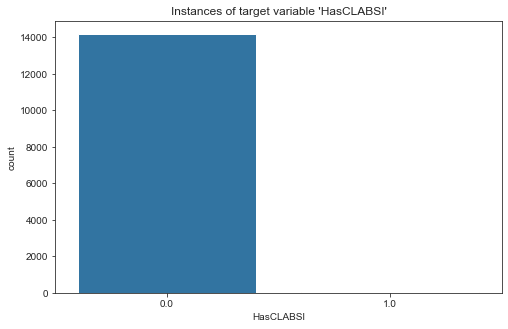

In [43]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'HasCLABSI', data = df_clabsi)
plot.set(title="Instances of target variable 'HasCLABSI'")

The above plot shows the patients CLABSI infection  with 52 instances of TRUE and 14184 instances of FALSE.

### Displaying the correlation between input variables and the target 'HasCLABSI' variable

In [44]:
df_clabsi.corr()['HasCLABSI'].sort_values(ascending=False)

HasCLABSI                                1.000000
HasFutureEncounterCLABSI                 0.209961
DiagnosisCancerLast15                    0.051260
DiagnosisCancerLast30                    0.046214
PICUDaysLast30                           0.045322
HCLAdministeredLast5                     0.045147
AlteplaseAdministeredLast30              0.041839
HCLAdministeredLast3                     0.041016
HCLAdministeredLast2                     0.039651
HCLAdministeredLast15                    0.038001
ICUDaysLast30                            0.037565
HospitalDay                              0.036599
MedsBowelRegimenLast30                   0.035978
LineDaysDoubleLumen                      0.035640
LineDaysMultiLumen                       0.035278
HCLAdministeredLast30                    0.034337
DiagnosisTransplantLast30                0.033930
ICUDaysLast15                            0.032804
ChlorhexidineLast30                      0.032151
CHGBathsLast30                           0.031565


#### Observations based on above correlation:

- HasCLABSI, the target variable, has a correlation of 1 with itself (the highest possible value).

- The correlation between the variables 'HasCLABSI' and 'HasFutureEncounterCLABSI' is 0.209961 i.e., approximately 0.21

- There is no strong correlation between the target variable 'HasCLABSI' and remaining all other variables.


## Exploring the Patients data through Visualization 

#### AgeGroup variable 

In [45]:
## To get the discrete labels and value counts for 'AgeGroup'
n_labels_agegroup = df_clabsi['AgeGroup'].nunique()
print(f'There are {n_labels_agegroup} discrete labels in "AgeGroup"') 
print()
print('The AgeGroup labels and their respective value counts:')
print()
print(df_clabsi.AgeGroup.value_counts())


There are 19 discrete labels in "AgeGroup"

The AgeGroup labels and their respective value counts:

0 - 2 Years      6482
2 - 4 Years      1346
4 - 6 Years      1248
8 - 10 Years     1220
16 - 18 Years     856
12 - 14 Years     754
10 - 12 Years     678
14 - 16 Years     667
18 - 20 Years     454
6 - 8 Years       264
22 - 24 Years     172
20 - 22 Years      71
24 - 26 Years      14
34 - 36 Years       3
36 - 38 Years       3
28 - 30 Years       1
30 - 32 Years       1
42 - 44 Years       1
38 - 40 Years       1
Name: AgeGroup, dtype: int64


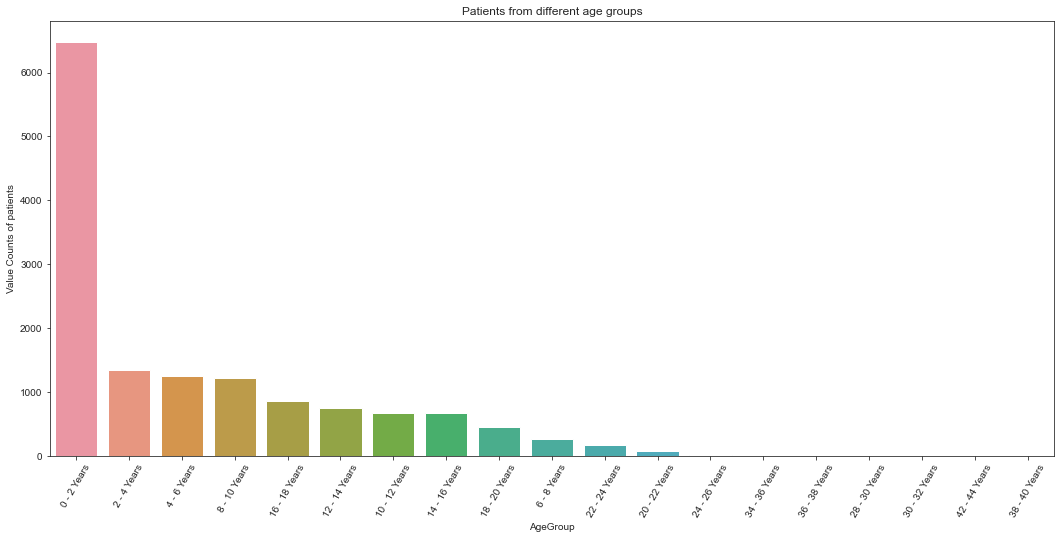

In [46]:
# Plot showing patients from different AgeGroup

plt.figure(figsize = (18, 8))
plot1 = sns.countplot(x = 'AgeGroup', data = df_clabsi, order = df_clabsi['AgeGroup'].value_counts().index)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 60)
plot1.set_title("Patients from different age groups")
plot1.set_ylabel("Value Counts of patients")
plt.show()

### Observations based on the above plot:
  
- Plot indicates majority of the patients belong to the age group of 0-2 years.
- Age group 2-4 years, 4-6 years and 8-10 years  are having closer to similar distribution of patient and other age groups show lesser number of patients.
- The dataset has no patients above the age of 44 years. 

#### LineCount

In [47]:
## To get the discrete labels and value counts for 'LineCount' variable

n_labels_lineCount = df_clabsi['LineCount'].nunique()
print(f'There are {n_labels_lineCount} discrete labels in "LineCount"') 
print()
print('The LineCount labels and their respective value counts:')
print()
print(df_clabsi.LineCount.value_counts())


There are 5 discrete labels in "LineCount"

The LineCount labels and their respective value counts:

1    12165
2     1706
3      265
4       79
5       21
Name: LineCount, dtype: int64


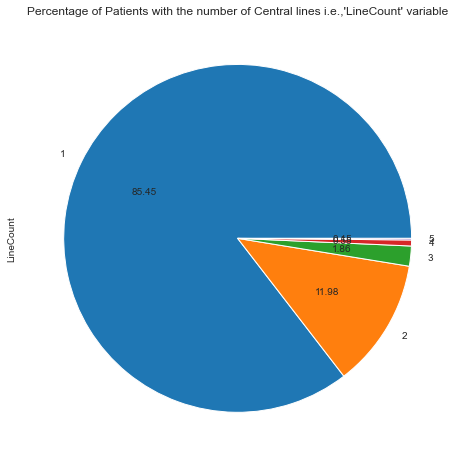

In [48]:
# Pie chart displaying the LineCount discrete labels in percentages

plt.figure(figsize = (20, 8))
plot2 = df_clabsi['LineCount'].value_counts().plot(kind='pie' , autopct='%.2f')
plot2.set_title("Percentage of Patients with the number of Central lines i.e.,'LineCount' variable")
plot2.set_ylabel("LineCount")
plt.show()

### Observations based on above pie chart and discrete labels of 'LineCount' value counts:

- The LineCount variable has 5 labels 1, 2, 3, 4 and 5 respectively which represent the patient with the number of central lines.
- From the above calculated value counts and the pie chart of 'LineCount' variable, Label '1' shows a value count of 12165 representing 85.45% of patients had one central line being inserted. 11.98% of patients had two central lines with value count of 1706. Similarly 1.86% of patients had 3 central lines with value count of 265, 0.55% of patients had 4 central lines with count 79 and finally very less patient count of 21 had 5 central lines accounting 0.15%. 

#### PastCLABSIs

In [49]:
## To get the discrete labels and value counts for 'PastCLABSIs' variable

n_labels_pastClabsi = df_clabsi['PastCLABSIs'].nunique()
print(f'There are {n_labels_pastClabsi} discrete labels in "PastCLABSIs"') 
print()
print('The PastCLABSIs labels and their respective value counts:')
print()
print(df_clabsi.PastCLABSIs.value_counts())

There are 3 discrete labels in "PastCLABSIs"

The PastCLABSIs labels and their respective value counts:

0    13003
1      920
2      313
Name: PastCLABSIs, dtype: int64


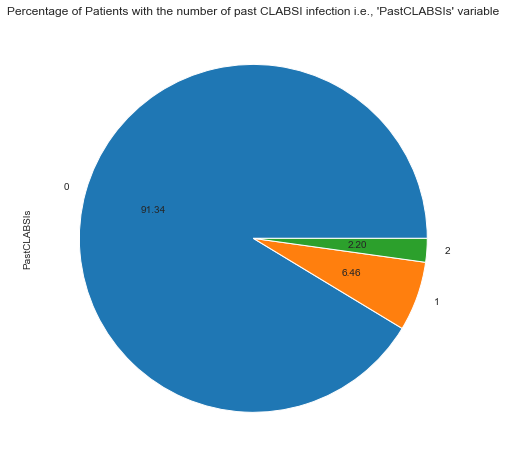

In [50]:
# Pie chart displaying the PastCLABSIs discrete labels in percentages

plt.figure(figsize = (20, 8))
plot2 = df_clabsi['PastCLABSIs'].value_counts().plot(kind='pie' , autopct='%.2f')
plot2.set_title("Percentage of Patients with the number of past CLABSI infection i.e., 'PastCLABSIs' variable")
plot2.set_ylabel("PastCLABSIs")
plt.show()

### Observations based on above pie chart and discrete labels of 'PastCLABSIs' value counts:

- The 'PastCLABSIs' variable has 3 labels 0, 1 and 2 respectively which represent the patient with the number of past CLABSI infections.
- From the above calculated value counts and the pie chart of 'PastCLABSIs' variable, Label '0' shows a value count of 13003 representing 91.34% of patients had no past CLASBI infection. However, 6.46% of patients had past CLABSI infection once with value count of 920 reprsenting label '1' and 2.20% i.e., 313 patients were infected twice in the past with CLABSI representing label '2'. 

#### HasRecentLDAFlowsheetRecords

In [51]:
## To get the discrete labels and value counts for 'HasRecentLDAFlowsheetRecords' variable

n_labels_records = df_clabsi['HasRecentLDAFlowsheetRecords'].nunique()
print(f'There are {n_labels_records} discrete labels in "HasRecentLDAFlowsheetRecords"') 
print()
print('The HasRecentLDAFlowsheetRecords labels and their respective value counts:')
print()
print(df_clabsi.HasRecentLDAFlowsheetRecords.value_counts())

There are 2 discrete labels in "HasRecentLDAFlowsheetRecords"

The HasRecentLDAFlowsheetRecords labels and their respective value counts:

1.0    12764
0.0     1472
Name: HasRecentLDAFlowsheetRecords, dtype: int64


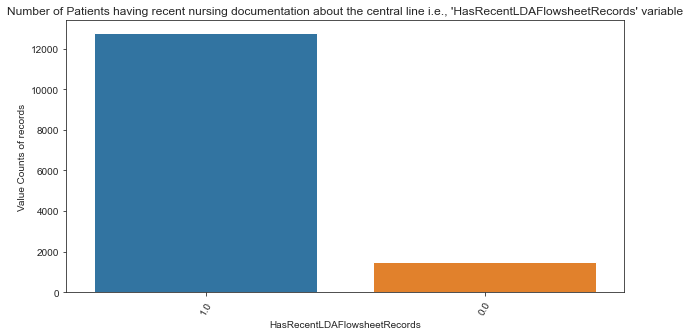

In [52]:
## Plot for 'HasRecentLDAFlowsheetRecords' variable

plt.figure(figsize = (10, 5)) 
plot1 = sns.countplot(x = 'HasRecentLDAFlowsheetRecords', data = df_clabsi, order = df_clabsi['HasRecentLDAFlowsheetRecords'].value_counts().index)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 60)
plot1.set_title("Number of Patients having recent nursing documentation about the central line i.e., 'HasRecentLDAFlowsheetRecords' variable")
plot1.set_ylabel("Value Counts of records")
plt.show()

### Observations of 'HasRecentLDAFlowsheetRecords' variable plot:

- The plot shows 12764 patients having recent nursing documentation about the central line. However, 1472 patients don't have the documentation.

#### UndergoingChemoTreatment

In [53]:
## To get the discrete labels and value counts for 'UndergoingChemoTreatment' variable

n_labels_chemo = df_clabsi['UndergoingChemoTreatment'].nunique()
print(f'There are {n_labels_chemo} discrete labels in "UndergoingChemoTreatment"') 
print()
print('The UndergoingChemoTreatment labels and their respective value counts:')
print()
print(df_clabsi.UndergoingChemoTreatment.value_counts())

There are 2 discrete labels in "UndergoingChemoTreatment"

The UndergoingChemoTreatment labels and their respective value counts:

0    13926
1      310
Name: UndergoingChemoTreatment, dtype: int64


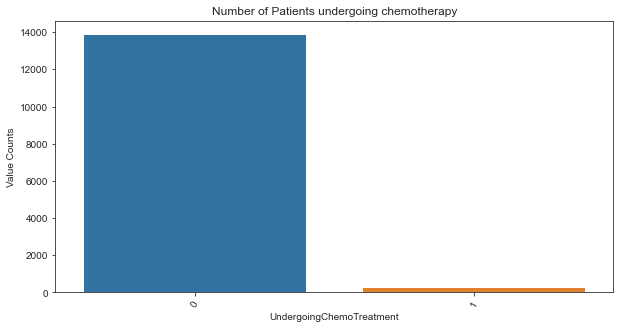

In [54]:
## Plot for 'UndergoingChemoTreatment' variable

plt.figure(figsize = (10, 5)) 
plot1 = sns.countplot(x = 'UndergoingChemoTreatment', data = df_clabsi, order = df_clabsi['UndergoingChemoTreatment'].value_counts().index)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 60)
plot1.set_title("Number of Patients undergoing chemotherapy")
plot1.set_ylabel("Value Counts")
plt.show()

### Observations of 'UndergoingChemoTreatment' variable plot:
- Lesser number of patients underwent chemotherapy.

#### SurgeryGroupsLast30

In [55]:
## To get the discrete labels and value counts for 'SurgeryGroupsLast30' variable

n_labels_Surgery = df_clabsi['SurgeryGroupsLast30'].nunique()
print(f'There are {n_labels_Surgery} discrete labels in "SurgeryGroupsLast30"') 
print()
print('The SurgeryGroupsLast30 labels and their respective value counts:')
print()
print(df_clabsi.SurgeryGroupsLast30.value_counts())

There are 7 discrete labels in "SurgeryGroupsLast30"

The SurgeryGroupsLast30 labels and their respective value counts:

0        7325
3        5224
3 6       995
6         400
3 4       142
3 4 6     120
4          30
Name: SurgeryGroupsLast30, dtype: int64


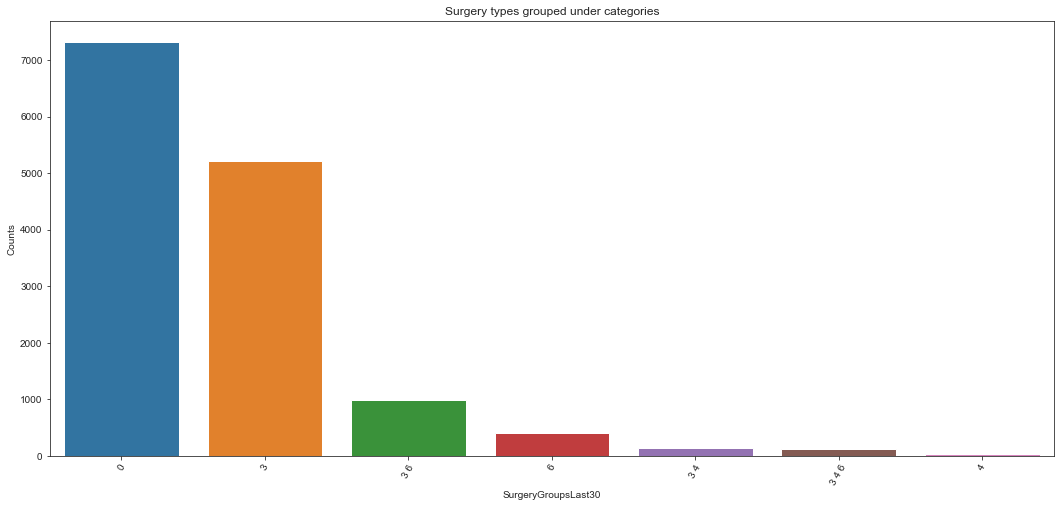

In [56]:
# Plot for 'SurgeryGroupsLast30' variable

plt.figure(figsize = (18, 8))
plot1 = sns.countplot(x = 'SurgeryGroupsLast30', data = df_clabsi, order = df_clabsi['SurgeryGroupsLast30'].value_counts().index)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 60)
plot1.set_title("Surgery types grouped under categories")
plot1.set_ylabel("Counts")
plt.show()

### Observations of 'SurgeryGroupsLast30' variable plot:

- The variable 'SurgeryGroupsLast30' consists of 7 discrete labels namely 0, 3, 3 6, 6, 3 4, 3 4 6 and 4.
- Around 7325 patients are without any surgery, 5224 patients are having label '3' category group of surgery, 995 patients are under 3 6 category and all other remaining patients fall under labels 6, 3 4, 3 4 6 and 4 respectively.

#### DepartmentDSC

In [57]:
## To get the discrete labels and value counts for 'DepartmentDSC' variable

n_labels_department = df_clabsi['DepartmentDSC'].nunique()
print(f'There are {n_labels_department} discrete labels in "DepartmentDSC"') 
print()
print('The DepartmentDSC labels and their respective value counts:')
print()
print(df_clabsi.DepartmentDSC.value_counts())

There are 47 discrete labels in "DepartmentDSC"

The DepartmentDSC labels and their respective value counts:

WT HEMATOLOGY/ONCOLOGY    2103
WT NEWBORN CNTR LVL 3     2036
WT CARDIOVASCULR ICU      1133
WT GNRL MEDICINE           990
WT BNE MRRW TRNSPLT UT     930
WT PUL ADOL ENDO           818
LT PICU 9                  561
PW NICU                    528
WT SURGERY CARE            513
WT PEDI INTSV CARE UT      484
LT PICU 10                 414
LT CVICU 16                334
LT PICU 12                 328
0                          325
LT CVICU 17                256
WT PROGRESSIVE CARE UT     252
WT NEURO SCNC/SURGERY      240
WC 3 WEST                  224
WL 5                       212
AB 5 NORTH                 202
LT CVICU 18                164
WT NEWBORN CNTR LVL 2      138
AB 7 SOUTH                 136
WL NICU                    131
LT CARDIOLOGY INPT 23      121
WC 4 PICU                  105
AB 6 NORTH                  96
WT REHABILITATION           92
WL PICU               

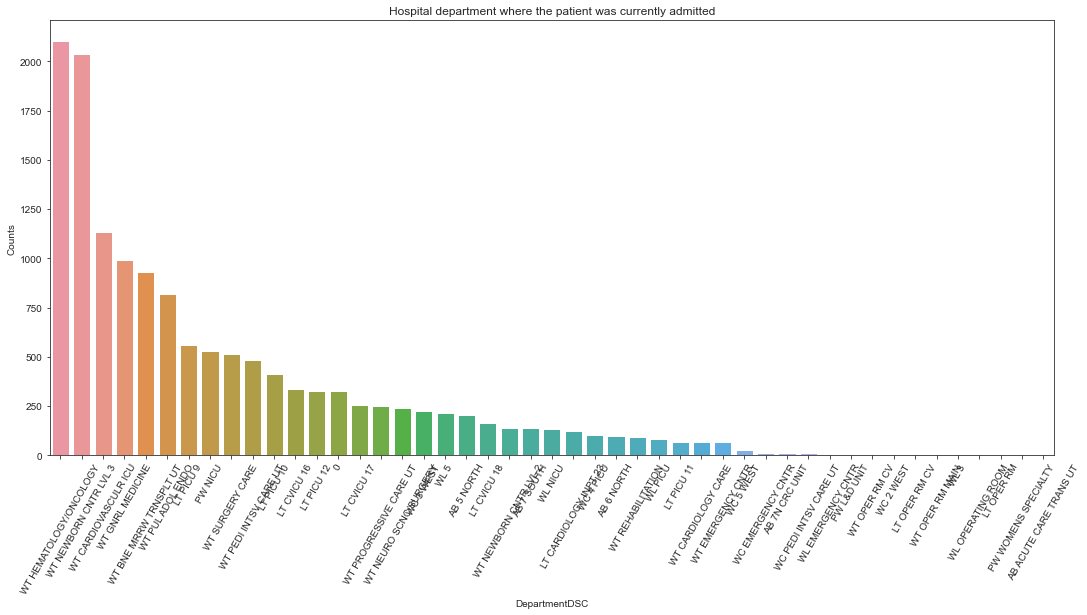

In [58]:
# Plot for 'SurgeryGroupsLast30' variable

plt.figure(figsize = (18, 8))
plot1 = sns.countplot(x = 'DepartmentDSC', data = df_clabsi, order = df_clabsi['DepartmentDSC'].value_counts().index)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 60)
plot1.set_title("Hospital department where the patient was currently admitted")
plot1.set_ylabel("Counts")
plt.show()

### Observations of 'DepartmentDSC' variable plot:

- According to the above plot we can see most of the patients were admitted in 'HEMATOLOGY/ONCOLOGY','NEWBORN CNTR LVL 3', 'CARDIOVASCULR ICU', 'GNRL MEDICINE' and 'BNE MRRW TRNSPLT UT' departments.
- All the other remaining patients were admitted into respective departments which can be visualized in the above plot.

## Overall analysis of the CLABSI Patient data:

- Majority of the patients belong to the age group of 0-2 years.
- Around 85.45% of patients had one central line being inserted.
- 91.34% of patients had no past CLASBI infection. Whereas 6.46% of patients had past CLABSI infection once and 2.20% of patients were infected twice in the past with CLABSI. 
- Majority of patients were having recent nursing documentation about the central line.
- Only 310 patients were undergoing chemotherapy.
- Around 51.45% of patients are without any surgeries.
- Most of the patients were admitted in 'HEMATOLOGY/ONCOLOGY','NEWBORN CNTR LVL 3', 'CARDIOVASCULR ICU', 'GNRL MEDICINE' and 'BNE MRRW TRNSPLT UT' departments.

## Visualization of Collinearity 

### Creating visualization to detect collinear input variables in the dataset
As the dataset is huge and with many similar/duplicate columns representing similar information. It becomes difficult to check multi-collinearity considering all the variables leading to outcome bias. Therefore, we are shortlisting columns/variables which we believe will add value in buiding the required models.

In [59]:
# Creating a new dataset by shortlisting input variables to detect the collinearity

df_clabsi_heatmap = df_clabsi[['HospitalDay','LineCount','LineDay','HasCLABSI','PastCLABSIs','HadPreviousCLABSI',
           'LineDaysPort','LineDaysPICC','LineDaysVenousAccess','LineDaysSingleLumen','LineDaysDoubleLumen',
           'LineDaysTripleLumen','LineDaysQuadrupleLumen','LineDaysMultiLumen','LineDaysFemoral','LineDaysSubclavian',
           'LineDaysUpperArm','LineDaysJugular','LineDaysChest','LineDaysLeg','FlushedLast10','CapChangesLast10',
           'DressingChangesLast10','TubingChangesLast10','UndergoingChemoTreatment','CytarabineChemoLast30',
           'ChlorhexidineLast30','CountMedicationsLast30','MedicationsLast30','MedicationsInjectedLast30',
           'AlteplaseAdministeredLast30','HCLAdministeredLast30','MedsAcidSuppTherapyLast30','MedsBowelRegimenLast30',
           'MedsCentralTPNLast30','MedsFatEmulsionLast30','MedsH2RALast30','MedsNSAIDLast30','MedsOralCareLast30',
           'MedsPeripheralTPNLast30','MedsPPILast30','MedsPrematureLast30','MedsPropofolLast30','MedsSteroidsLast30',
           'ProceduresLast30','ICDCodesLast30','ICDCategoriesLast30','DiagnosisLast30','DiagnosisLeukemiaLast30',
           'DiagnosisTransplantLast30','DiagnosisClotLast30','DiagnosisCancerLast30','DiagnosisDisorderLast30',
           'DiagnosisPtSizeLast30','DiagnosisEventLast30','DiagnosisInfectionLast30','DiagnosisShuntCardiacLast30',
           'DiagnosisRenalLast30','SurgeryGroupsLast30','SurgerySubGroupsLast30','SurgeryCountLast30','SurgeriesLast30',
           'SurgeriesBloodLast30','SurgeriesCancerLast30','SurgeriesCongenitalHeartDiseaseLast30',
           'SurgeriesSingleVentricleLast30','SurgeriesICULast30','SurgeriesAbdominalLast30','SurgeriesIntestinalLast30',
           'SurgeriesPlasticLast30','SurgeriesDelayedSternalClosure','CHGNonCompliantDays','CHGBathsLast30',
           'SedatedLast30','ICUDaysLast30','PICUDaysLast30','NICUDaysLast30','CVICUDaysLast30']].copy()

In [60]:
# Correlation
clabsi_correlationtest = df_clabsi_heatmap.corr()

<AxesSubplot:>

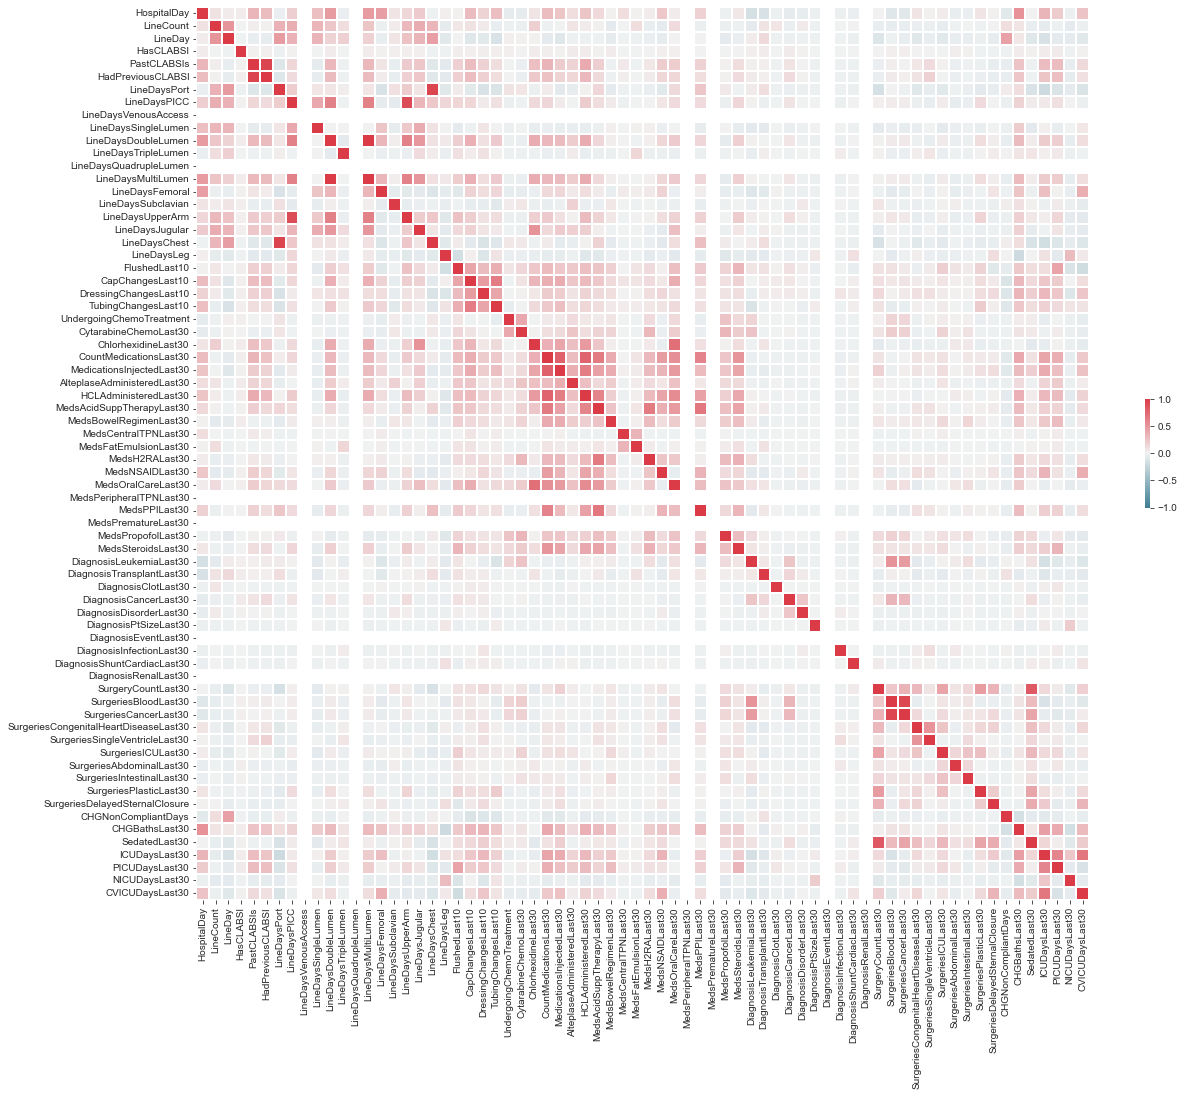

In [61]:
# Preparing tools for making a correlation heatmap
mask = np.triu(np.ones_like(clabsi_correlationtest, bool))
f, ax = plt.subplots(1,1, figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Plot heatmap
sns.heatmap(clabsi_correlationtest, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, 
            linewidths=1.5, cbar_kws={'shrink': .1})

In [62]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
import sys
np.set_printoptions(threshold=2000)

In [63]:
# Variables with collinearity greater than 0.7

pd.set_option("display.max_rows", None, "display.max_columns", None)
corr_var = df_clabsi_heatmap.corr().stack().reset_index()
corr_var.columns = ['Variable1', 'Variable2', 'CORRELATION']
mask_dups = (corr_var[['Variable1', 'Variable2']].apply(frozenset, axis=1).duplicated()) | (corr_var['Variable1']==corr_var['Variable2']) 
corr_var = corr_var[~mask_dups]
corr_var = corr_var.round(5)
corr_var = corr_var[corr_var['CORRELATION'] > .70]
corr_var.sort_values('CORRELATION',ascending=False)

Variable1                  Variable2  CORRELATION
587      LineDaysDoubleLumen         LineDaysMultiLumen      0.99790
400             LineDaysPort              LineDaysChest      0.94151
261              PastCLABSIs          HadPreviousCLABSI      0.93993
3121    SurgeriesBloodLast30      SurgeriesCancerLast30      0.92835
462             LineDaysPICC           LineDaysUpperArm      0.90162
3067      SurgeryCountLast30              SedatedLast30      0.82983
1626  CountMedicationsLast30  MedicationsInjectedLast30      0.78471
1628  CountMedicationsLast30      HCLAdministeredLast30      0.76953
1571     ChlorhexidineLast30         MedsOralCareLast30      0.70565

### Performing a train-test split

In [64]:
X = df_clabsi.drop(columns=['PatientKey','EncounterKey','HasCLABSI'])
y = df_clabsi['HasCLABSI']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [66]:
corrmatrix = X_train.corr()

In [67]:
# Displaying the correlation matrix
corrmatrix

HospitalDay  LineCount   LineDay  \
HospitalDay                               1.000000   0.089677  0.041734   
LineCount                                 0.089677   1.000000  0.522809   
LineDay                                   0.041734   0.522809  1.000000   
HasFutureEncounterCLABSI                  0.063916  -0.012730 -0.076052   
PastCLABSIs                               0.331877   0.019713 -0.040268   
HadPreviousCLABSI                         0.288750   0.001998 -0.049761   
LineDaysPort                             -0.036914   0.335120  0.468265   
LineDaysPICC                              0.193679   0.371734  0.368323   
LineDaysVenousAccess                           NaN        NaN       NaN   
LineDaysSingleLumen                       0.281074   0.337507  0.356301   
LineDaysDoubleLumen                       0.464130   0.231760  0.174520   
LineDaysTripleLumen                      -0.032101   0.122592  0.173255   
LineDaysQuadrupleLumen                         NaN        NaN       NaN   
LineDaysMultiLumen                        0.463167   0.240022  0.185846   
LineDaysFemoral                           0.457794  -0.031351 -0.043040   
LineDaysSubclavian                        0.079364   0.040046  0.073502   
LineDaysUpperArm                          0.140957   0.314766  0.274095   
LineDaysJugular                           0.217887   0.394015  0.352749   
LineDaysChest                            -0.007857   0.312401  0.454739   
LineDaysLeg                               0.008494  -0.056759 -0.080548   
HasRecentLDAFlowsheetRecords              0.054961  -0.151118 -0.297510   
FlushedToday                             -0.072679   0.034689 -0.009121   
FlushedLast4                             -0.047387   0.053169 -0.005544   
FlushedLast7                             -0.015154   0.055811 -0.005191   
FlushedLast10                             0.008227   0.056857 -0.003675   
CapChangesLastToday                       0.081580   0.042481 -0.056547   
CapChangesLast4                           0.192029   0.070676 -0.109190   
CapChangesLast7                           0.250348   0.077465 -0.108504   
CapChangesLast10                          0.292191   0.084145 -0.102874   
DressingChangesLastToday                  0.015972   0.022048 -0.036400   
DressingChangesLast4                      0.070713   0.030316 -0.076591   
DressingChangesLast7                      0.122790   0.041051 -0.090853   
DressingChangesLast10                     0.163631   0.045470 -0.087830   
TubingChangesLastToday                    0.061595  -0.023152 -0.073160   
TubingChangesLast4                        0.160047  -0.051670 -0.140026   
TubingChangesLast7                        0.226147  -0.052204 -0.142767   
TubingChangesLast10                       0.277676  -0.048546 -0.138222   
LastAnc                                   0.255688  -0.056107 -0.108604   
LastAncDelta                             -0.011020   0.013988  0.025487   
UndergoingChemoTreatment                 -0.054004  -0.019471  0.007921   
CytarabineChemoLast30                    -0.055061  -0.026789  0.005104   
ChlorhexidineLast30                       0.068078   0.187232  0.011639   
CountMedicationsLast30                    0.287493  -0.019380 -0.067012   
CountMedicationsLast15                    0.240138  -0.024337 -0.075850   
CountMedicationsLast5                     0.173989  -0.028458 -0.068473   
CountMedicationsLast3                     0.152511  -0.028846 -0.061853   
CountMedicationsLast2                     0.140189  -0.028006 -0.057664   
MedicationsInjectedLast30                 0.241867  -0.011143 -0.100007   
MedicationsInjectedLast15                 0.177577  -0.007216 -0.108861   
MedicationsInjectedLast5                  0.107711   0.000572 -0.106220   
MedicationsInjectedLast3                  0.089147   0.002911 -0.100281   
MedicationsInjectedLast2                  0.076850   0.004917 -0.094413   
AlteplaseAdministeredLast30               0.105633   0.075482 -0

In [68]:
def correlation(df_clabsi, threshold):
    correlated_columns = set()
    correlation_matrix = df_clabsi.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                column_names = correlation_matrix.columns[i]
                correlated_columns.add(column_names)
    return correlated_columns

In [69]:
correlated_variables = correlation(X_train, 0.8)
correlated_variables

{'AlteplaseAdministeredLast15',
 'AlteplaseAdministeredLast2',
 'AlteplaseAdministeredLast3',
 'CHGBathsLast15',
 'CHGBathsLast2',
 'CHGBathsLast3',
 'CHGBathsLast5',
 'CapChangesLast10',
 'CapChangesLast7',
 'CountMedicationsLast15',
 'CountMedicationsLast2',
 'CountMedicationsLast3',
 'CountMedicationsLast5',
 'DiagnosisClotLast3',
 'DiagnosisInfectionLast2',
 'DiagnosisLeukemiaLast15',
 'DiagnosisShuntCardiacLast2',
 'DiagnosisSwellingLast5',
 'DressingChangesLast10',
 'FlushedLast10',
 'FlushedLast7',
 'HCLAdministeredLast15',
 'HCLAdministeredLast2',
 'HCLAdministeredLast3',
 'HCLAdministeredLast5',
 'HadPreviousCLABSI',
 'ICUDaysLast15',
 'ICUDaysLast2',
 'ICUDaysLast3',
 'ICUDaysLast5',
 'LineDaysChest',
 'LineDaysMultiLumen',
 'LineDaysUpperArm',
 'MedicationsInjectedLast15',
 'MedicationsInjectedLast2',
 'MedicationsInjectedLast3',
 'MedicationsInjectedLast5',
 'MedsAcidSuppTherapyLast15',
 'MedsAcidSuppTherapyLast3',
 'MedsAcidSuppTherapyLast30',
 'MedsAcidSuppTherapyLast5',


In [70]:
X_train.drop(labels=correlated_variables, axis=1, inplace=True)
X_test.drop(labels=correlated_variables, axis=1, inplace=True)

In [71]:
X_train.shape, X_test.shape

((9965, 170), (4271, 170))

#### Evaluate validity of split using hypothesis-testing
###### Equal proportion for cases y=1

Stating null hypothesis H0 (Null Hypothesis): The proportion of patients with clabsi are same in both the sets or the proportion of the clabsi data train and test split are same in both the sets in terms of 'HasCLABSI' variable.

Hypothesis-testing procedure (z-test of equal proportion): with Alpha= 0.05 (Significance level or type-1 error)

In [72]:
count_default_train = y_train.value_counts()[1]
count_default_test = y_test.value_counts()[1]
z_stat, p = proportions_ztest(count=[count_default_train, count_default_test], nobs=[y_train.shape[0], y_test.shape[0]])
print('z-stat = {:0.3f}, p = {:0.3f}'.format(z_stat, p))

z-stat = -0.727, p = 0.467


#### Result interpretation:
The above results show z-stat = -0.727 and p = 0.467. Because p-value > alpha which is 0.05, we can conclude that H0 (Null hypothesis) is not rejected and the porportion of patients with clabsi is same in the two sets or the proportion of the clabsi data train and test split is same in the two sets in terms of the 'HasCLABSI' variable.